In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016 (6).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
df=pd.read_csv('KaggleV2-May-2016.csv')

In [ ]:
df.shape

(110527, 14)

In [ ]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.dtypes

,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.drop(['PatientId',"Scholarship"], axis=1, inplace=True)

In [ ]:
# Convert dates
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Extract datetime features
df['ScheduledDay_weekday'] = df['ScheduledDay'].dt.weekday
df['AppointmentDay_weekday'] = df['AppointmentDay'].dt.weekday
df['Days_until_appointment'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Encode categorical
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

# One-hot encode Neighbourhood if needed
df = pd.get_dummies(df, columns=['Neighbourhood'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 95 columns):
 #   Column                                     Non-Null Count   Dtype              
---  ------                                     --------------   -----              
 0   AppointmentID                              110527 non-null  int64              
 1   Gender                                     110527 non-null  int64              
 2   ScheduledDay                               110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay                             110527 non-null  datetime64[ns, UTC]
 4   Age                                        110527 non-null  int64              
 5   Hipertension                               110527 non-null  int64              
 6   Diabetes                                   110527 non-null  int64              
 7   Alcoholism                                 110527 non-null  int64              
 8   Handcap                           

In [ ]:
df.describe()

,AppointmentID,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_weekday,AppointmentDay_weekday,Days_until_appointment
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,0.649977,37.088874,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,1.851955,1.858243,9.183702
std,7.129575e+04,0.476979,23.110205,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,1.378520,1.371672,15.254996
min,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000
50%,5.680573e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000
75%,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,14.000000
max,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,5.000000,5.000000,178.000000


In [ ]:
df.isna().sum()

,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
...,...
Neighbourhood_SÃO JOSÉ,0
Neighbourhood_SÃO PEDRO,0
Neighbourhood_TABUAZEIRO,0
Neighbourhood_UNIVERSITÁRIO,0


In [ ]:
df.loc[df.duplicated()]

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM


In [ ]:
df['No-show'].map({0: 'No', 1: 'Yes'}).value_counts()

,count
No-show,
No,88208
Yes,22319


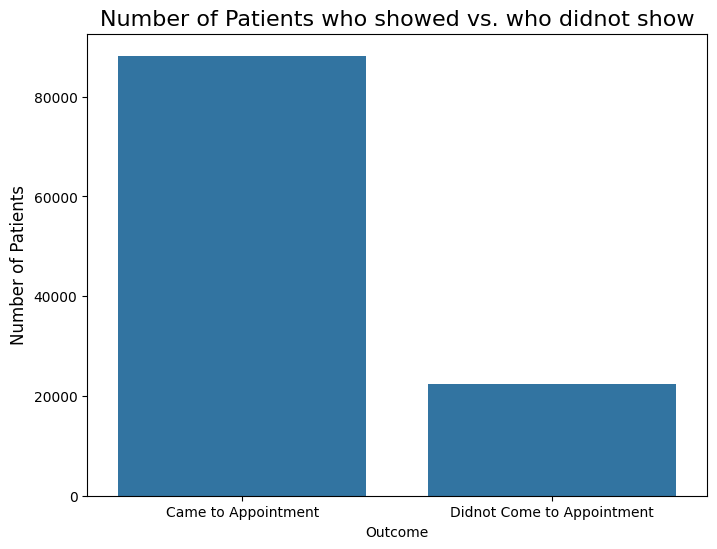

In [ ]:
counts = df['No-show'].value_counts()
counts_df = pd.DataFrame({'Outcome': counts.index, 'Count': counts.values})
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Count', data=counts_df)
plt.xticks(ticks=[0, 1], labels=['Came to Appointment', 'Didnot Come to Appointment'])
plt.title('Number of Patients who showed vs. who didnot show', fontsize=16)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

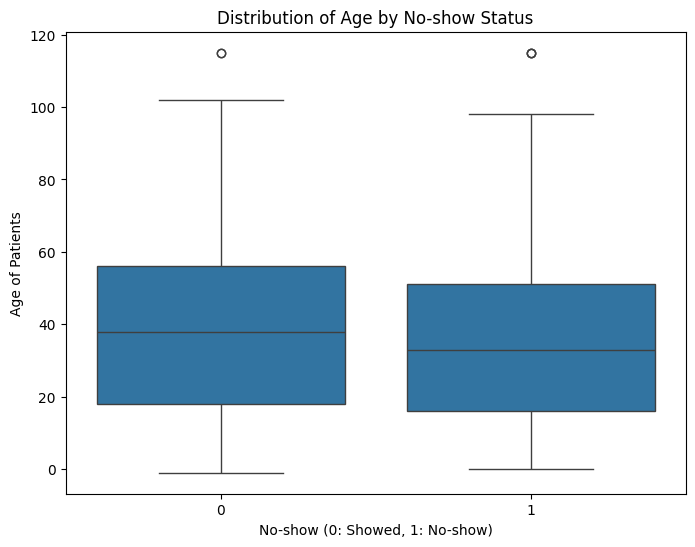

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# 'y' MUST be a numerical column that exists in your df (like 'Age')
sns.boxplot(x="No-show", y="Age", data=df)

plt.title("Distribution of Age by No-show Status")
plt.xlabel("No-show (0: Showed, 1: No-show)")
plt.ylabel("Age of Patients")
plt.show()

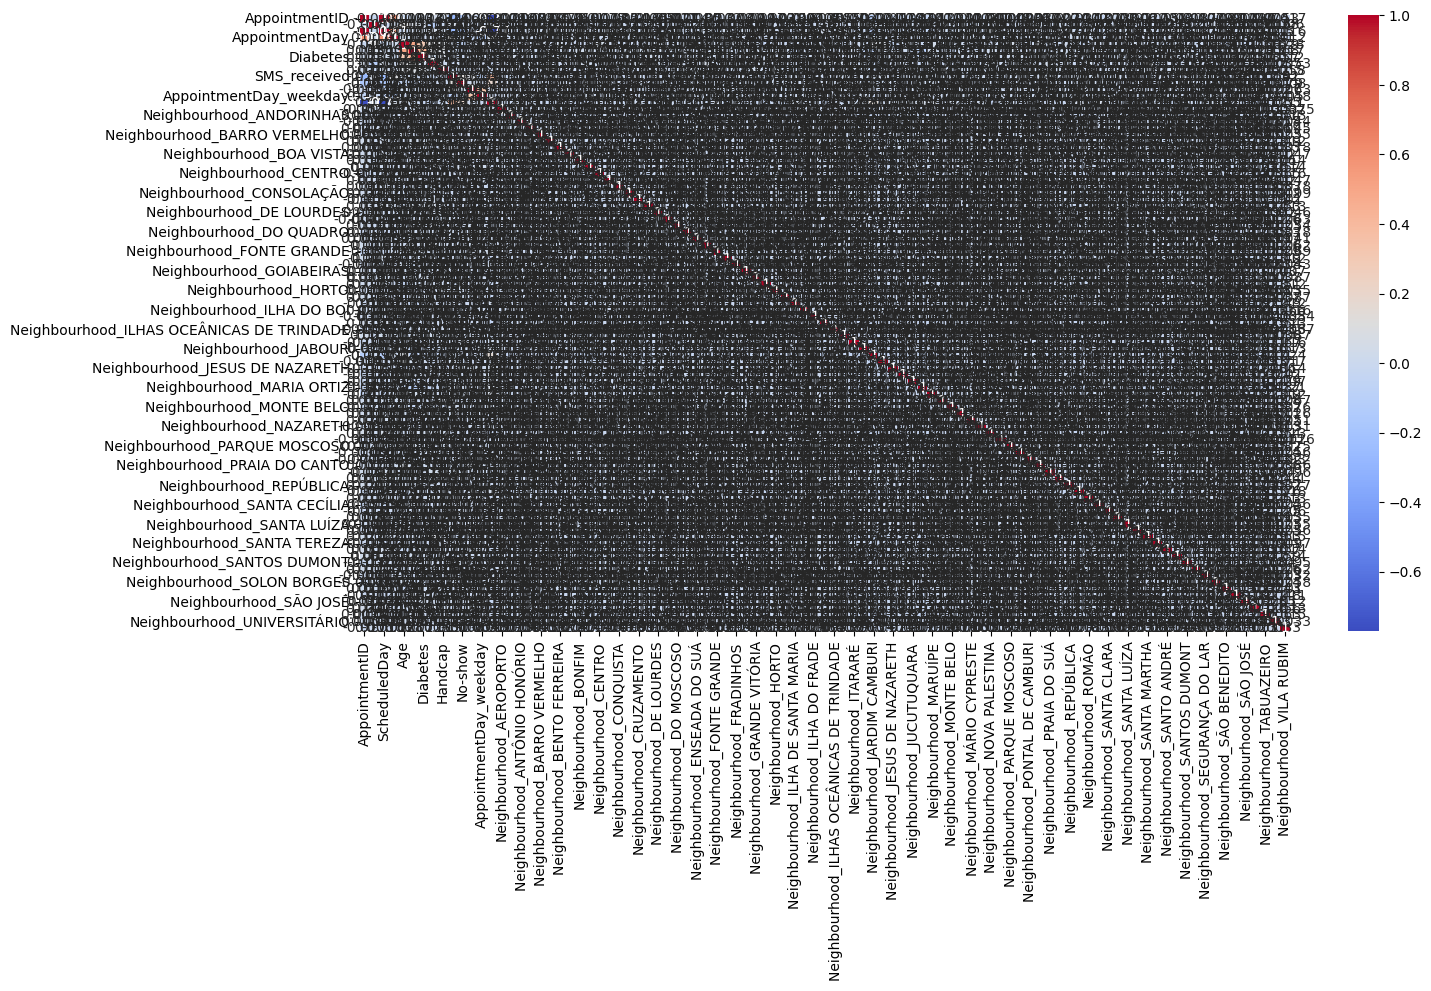

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

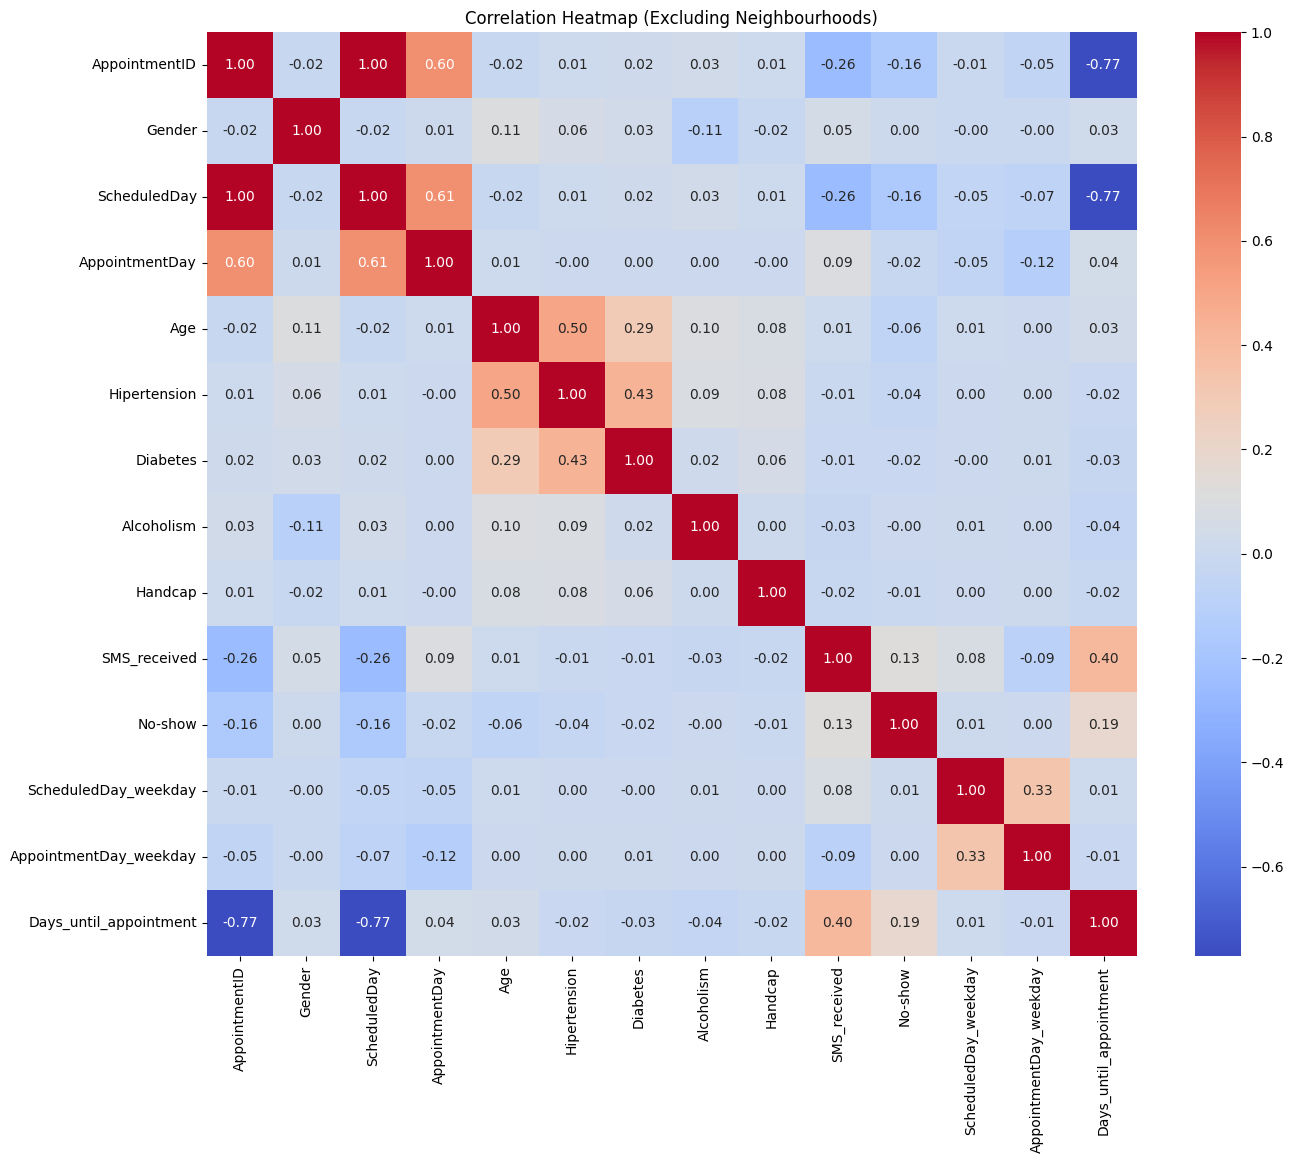

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

cols_to_exclude = [col for col in df.columns if 'Neighbourhood' in col]
df_subset = df.drop(columns=cols_to_exclude)

sns.heatmap(df_subset.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap (Excluding Neighbourhoods)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df_subset.drop(columns=["No-show"])
y = df_subset["No-show"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data=X_train.join(y_train)

In [ ]:
test_data=X_test.join(y_test)

In [ ]:
train_data.shape

(88421, 14)

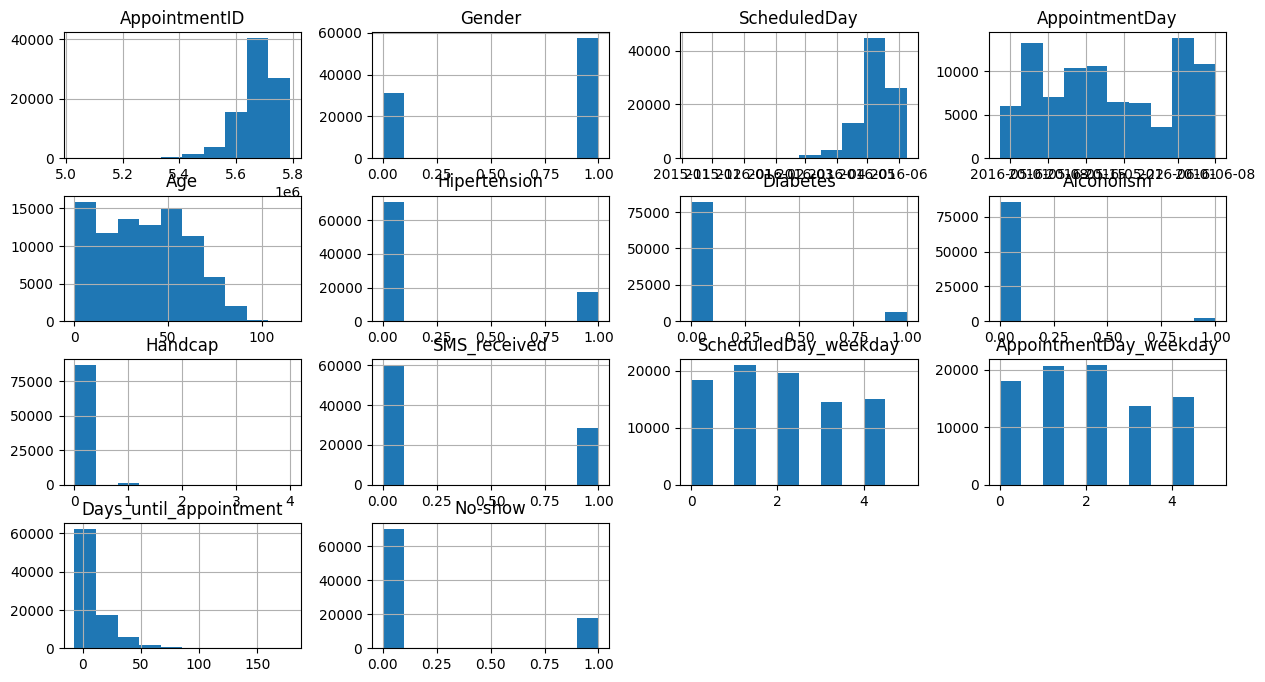

In [ ]:
train_data.hist(figsize=(15,8))
plt.show()

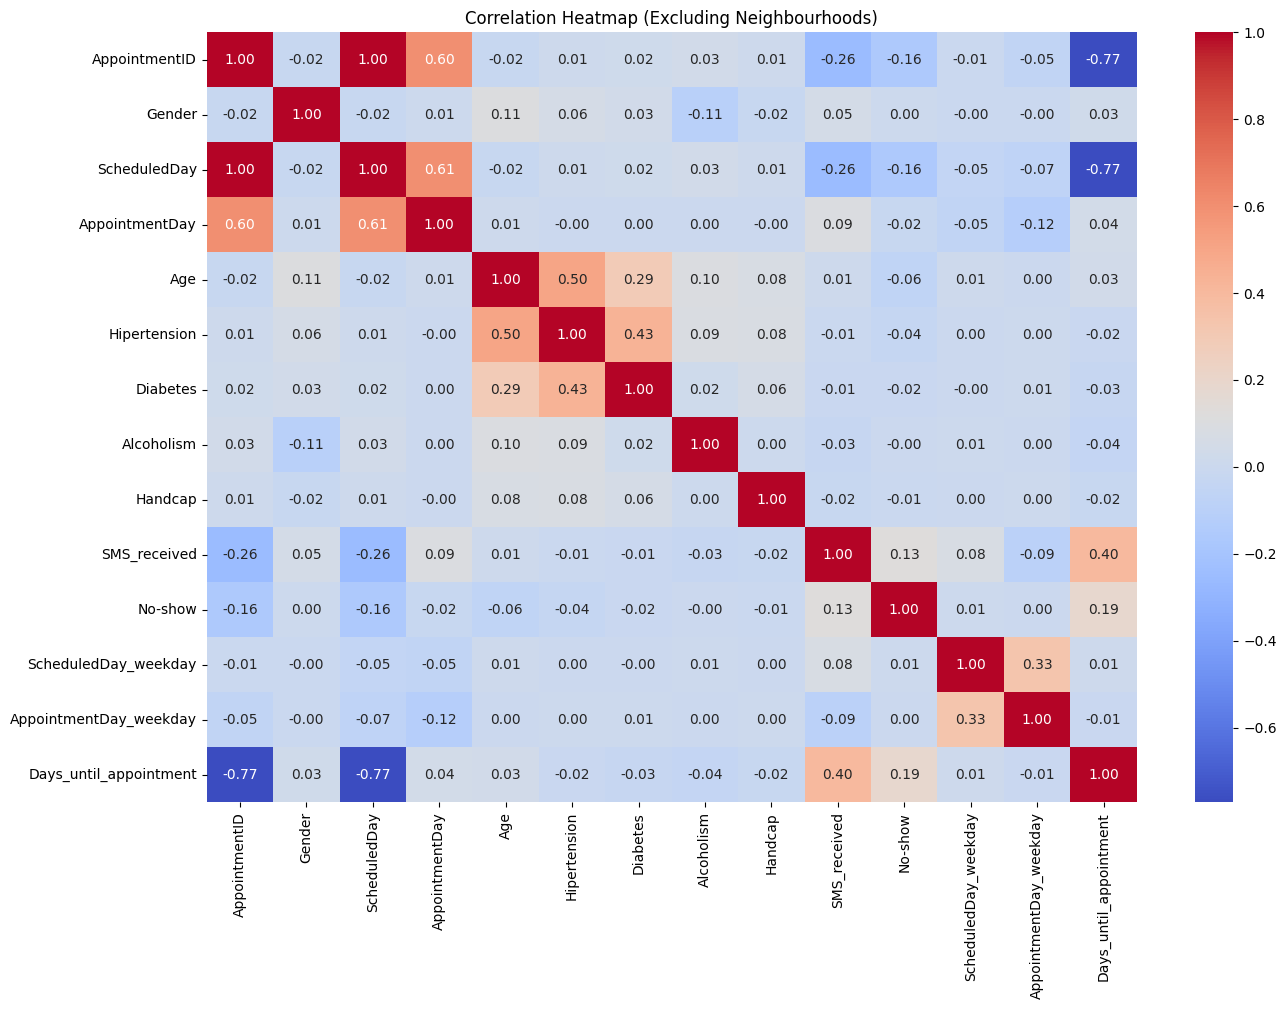

In [ ]:
plt.figure(figsize=(15, 10))

cols_to_exclude = [col for col in df.columns if 'Neighbourhood' in col]

df_subset = df.drop(columns=cols_to_exclude)

sns.heatmap(df_subset.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap (Excluding Neighbourhoods)")
plt.show()

In [ ]:
df_subset.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'ScheduledDay_weekday', 'AppointmentDay_weekday',
       'Days_until_appointment'],
      dtype='object')

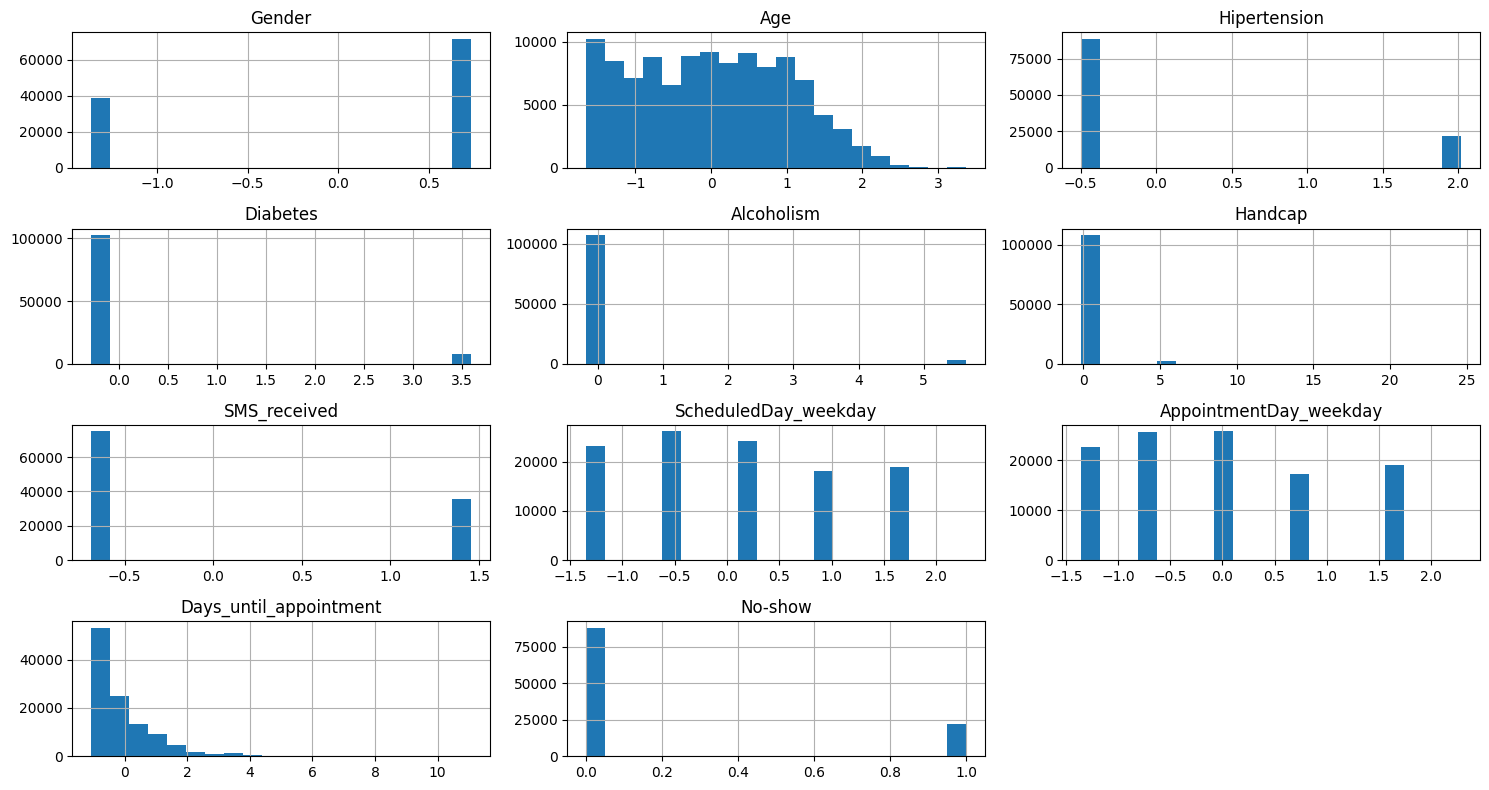

In [ ]:
from sklearn.preprocessing import StandardScaler
useful_cols = [
    'Gender', 'Age', 'Hipertension',
    'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
    'ScheduledDay_weekday', 'AppointmentDay_weekday', 'Days_until_appointment'
]

sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(df[useful_cols])

train_data = pd.DataFrame(X_scaled, columns=useful_cols, index=df.index)
train_data['No-show'] = df['No-show']
train_data.hist(figsize=(15, 8), bins=20)
plt.tight_layout()
plt.show()

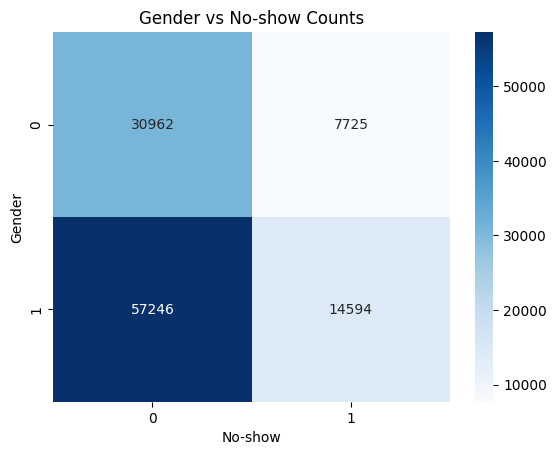

In [ ]:
# Check how Gender affects No-show
sns.heatmap(pd.crosstab(df['Gender'], df['No-show']), annot=True, fmt='d', cmap='Blues')
plt.title("Gender vs No-show Counts")
plt.show()

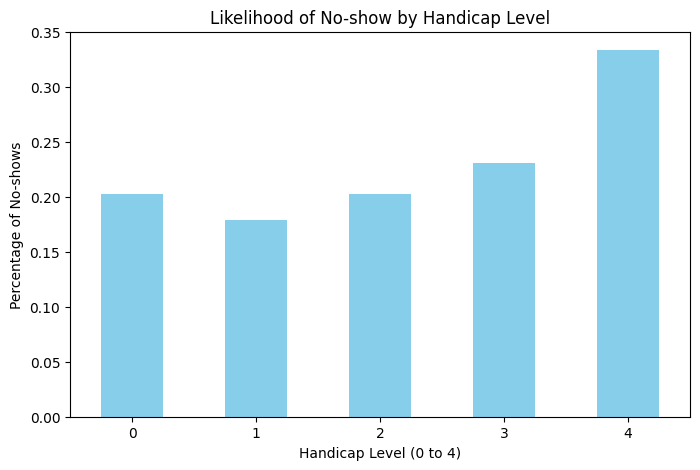

In [ ]:
# Calculate the percentage of No-shows within each Handicap group
handicap_ratio = df.groupby("Handcap")["No-show"].mean()

plt.figure(figsize=(8, 5))
handicap_ratio.plot(kind='bar', color='skyblue')
plt.title("Likelihood of No-show by Handicap Level")
plt.xlabel("Handicap Level (0 to 4)")
plt.ylabel("Percentage of No-shows")
plt.xticks(rotation=0)
plt.show()

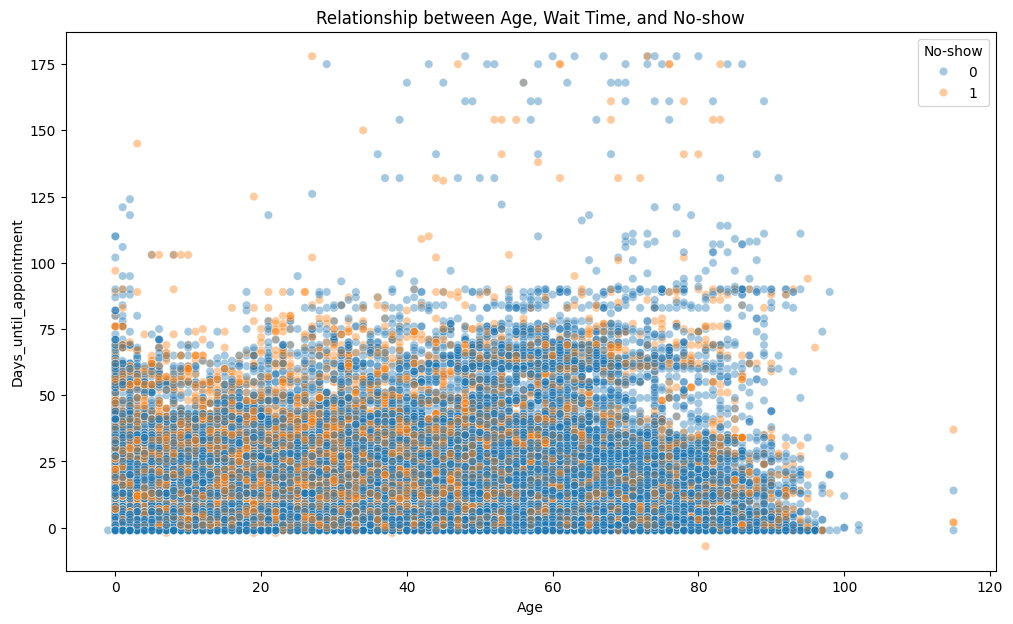

In [ ]:
plt.figure(figsize=(12, 7))

# A true scatter plot comparing two numbers
sns.scatterplot(data=df, x="Age", y="Days_until_appointment", hue="No-show", alpha=0.4)

plt.title("Relationship between Age, Wait Time, and No-show")
plt.show()

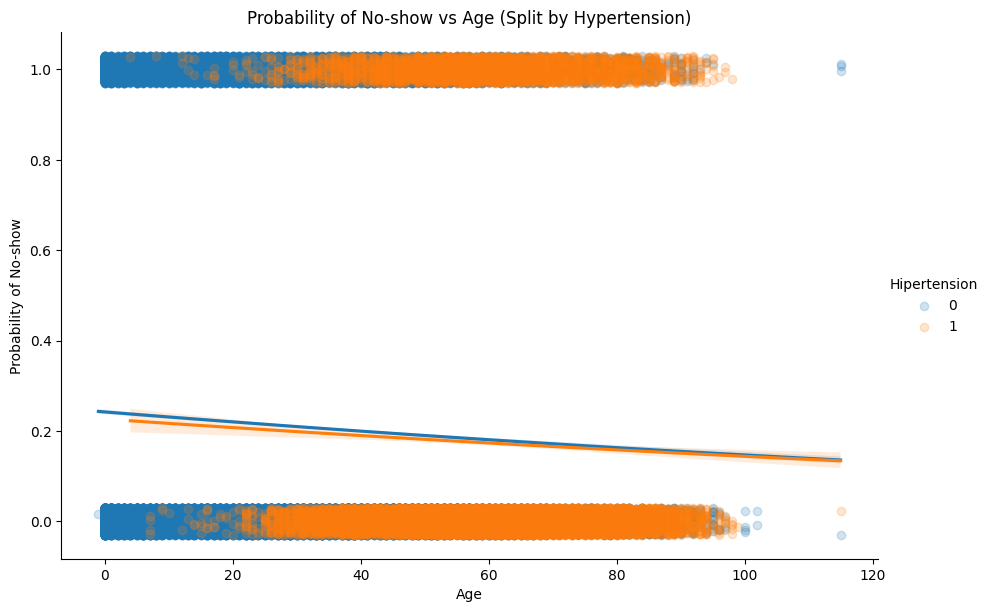

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# We use lmplot with logistic=True to show the actual trend/probability
sns.lmplot(x='Age', y='No-show', hue='Hipertension', data=df,
           logistic=True, y_jitter=0.03, height=6, aspect=1.5, scatter_kws={'alpha':0.2})

plt.title('Probability of No-show vs Age (Split by Hypertension)')
plt.ylabel('Probability of No-show')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Ensure column name matches exactly (Capital 'N')
X = train_data.drop(columns=["No-show"])
y = train_data["No-show"]

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train
model_reg = LogisticRegression(max_iter=1000)
model_reg.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [ ]:
model_reg.score(X_test,y_test)

0.7956663349316927

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
model_RF.score(X_test, y_test)

0.7631864652130643

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC # 100x faster than SVC() for large data

# 3-Fold CV is plenty for 110k rows
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# --- 1. LOGISTIC REGRESSION ---
pipe_log = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=1000))])
param_log = {'classifier__C': [0.1, 1, 10]}
grid_log = HalvingGridSearchCV(pipe_log, param_log, cv=cv, n_jobs=-1).fit(X_train, y_train)
print("1. Logistic Regression: Done")

# --- 2. RANDOM FOREST (Optimized) ---
# We limit max_depth to 15 to prevent the "infinite loop" of deep trees
pipe_rf = Pipeline([('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))])
param_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 15]
}
grid_rf = HalvingGridSearchCV(pipe_rf, param_rf, cv=cv, n_jobs=-1).fit(X_train, y_train)
print("2. Random Forest: Done")

# --- 3. SVM (Linear Version) ---
# We use LinearSVC because standard SVC(kernel='rbf') is too slow for 110k rows
pipe_svm = Pipeline([('scaler', StandardScaler()), ('classifier', LinearSVC(max_iter=2000, dual=False))])
param_svm = {'classifier__C': [0.1, 1, 10]}
grid_svm = HalvingGridSearchCV(pipe_svm, param_svm, cv=cv, n_jobs=-1).fit(X_train, y_train)
print("3. Linear SVM: Done")

# --- FINAL COMPARISON ---
results = {
    "Logistic Regression": grid_log.score(X_test, y_test),
    "Random Forest": grid_rf.score(X_test, y_test),
    "Linear SVM": grid_svm.score(X_test, y_test)
}

print("\nFinal Results:", results)

1. Logistic Regression: Done
2. Random Forest: Done
3. Linear SVM: Done

Final Results: {'Logistic Regression': 0.7956663349316927, 'Random Forest': 0.7995566814439519, 'Linear SVM': 0.7971591423143038}
